TIF images → `Extract-Channels` → `Visualize-Inputs` → `Predict-Segments` → `Visualize-Segmentation` → predicted segmentations

In [1]:
# Parameters (overridden by notebook parameters)
rgb_images_path = './saves/visualized_inputs.npz'
predictions_path = './saves/segmentation_predictions.npz'
output_path = './saves'

# Load the input RGB + predictions

In [2]:
from deepcell.utils.plot_utils import make_outline_overlay
import numpy as np

with np.load(rgb_images_path) as loader:
    input_rgbs = loader['rgb']

with np.load(predictions_path) as loader:
    segmentation_predictions = predictions = loader['predictions']

# Overlay the predictions over the input RGBs.

In [3]:
overlay_data = make_outline_overlay(rgb_data=input_rgbs, predictions=segmentation_predictions)

In [4]:
from PIL import Image

# The rgb values are 0..1, so normalize to 0..255
for index, rgb in enumerate(overlay_data * 255):
    im = Image.fromarray(rgb.astype(np.uint8))
    im.save(output_path + f'/segmented_{index}.png', mode='RGB')

# Visualize one of the predictions.

You can delete this step if you like.

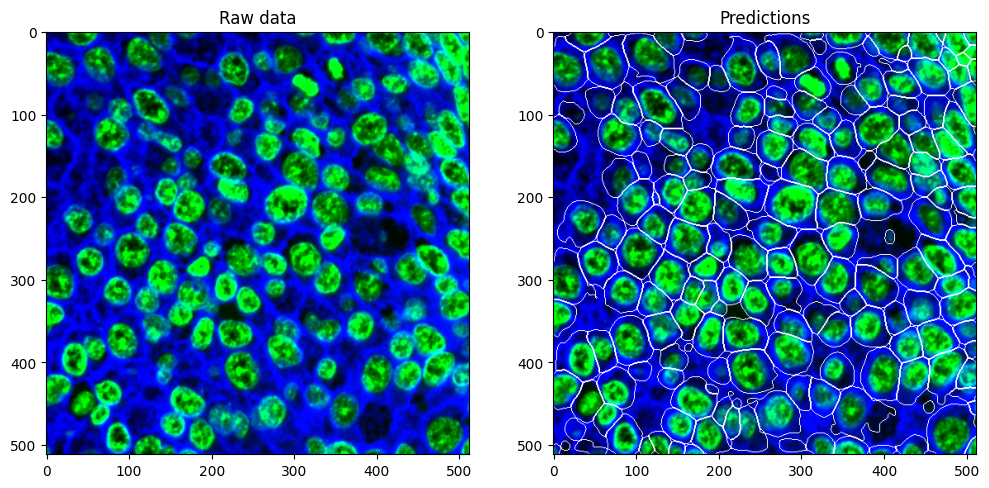

In [5]:
from matplotlib import pyplot as plt
import random

# Visualize an entry chosen arbitrarily
idx = random.randint(0, len(input_rgbs) - 1)

fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(input_rgbs[idx, ...])
ax[1].imshow(overlay_data[idx, ...])
ax[0].set_title('Raw data')
ax[1].set_title('Predictions')
plt.show()